In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

## get data from yajoo.finance

In [2]:
gld = pdr.get_data_yahoo('GLD', '2016-11-08')
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-08,123.089996,121.360001,122.120003,121.639999,9480600,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998
2016-11-10,121.540001,119.379997,121.519997,119.750000,22268000,119.750000
2016-11-11,119.690002,116.230003,119.650002,117.099998,20381800,117.099998
2016-11-14,117.139999,115.489998,116.120003,116.110001,20729400,116.110001


## discard unneeded data


In [3]:
gld_close = pd.DataFrame(gld.Close)
gld_close.head()

,Close
Date,
2016-11-08,121.639999
2016-11-09,121.559998
2016-11-10,119.750000
2016-11-11,117.099998
2016-11-14,116.110001


In [4]:
gld_close['MA_9'] = gld_close.Close.rolling(9).mean() # shift
gld_close['MA_21'] = gld_close.Close.rolling(21).mean()
gld_close.head(10)

,Close,MA_9,MA_21
Date,,,
2016-11-08,121.639999,NaN,NaN
2016-11-09,121.559998,NaN,NaN
2016-11-10,119.750000,NaN,NaN
2016-11-11,117.099998,NaN,NaN
2016-11-14,116.110001,NaN,NaN
2016-11-15,117.120003,NaN,NaN
2016-11-16,116.769997,NaN,NaN
2016-11-17,116.169998,NaN,NaN
2016-11-18,115.150002,117.929999,NaN


# Plot data and moving averages

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


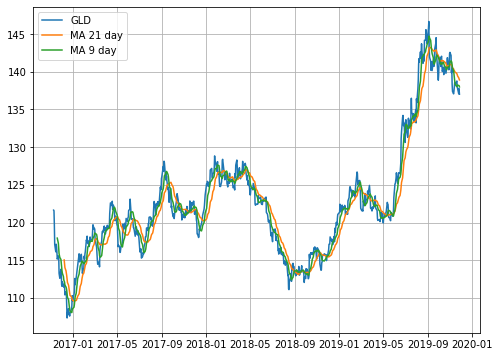

In [5]:
plt.figure(figsize = (8, 6))
plt.grid(True)
plt.plot(gld_close.Close, label = 'GLD')
plt.plot(gld_close.MA_21, label = 'MA 21 day')
plt.plot(gld_close.MA_9, label = 'MA 9 day')
plt.legend(loc = 2)

## compute log change

In [14]:
gld_close['change'] = np.log(gld_close['Close'])/gld_close['Close'].shift()

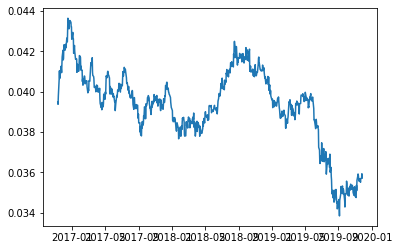

In [15]:
plt.plot(gld_close.change)

## computing rolling historical volatility, using .shift() method

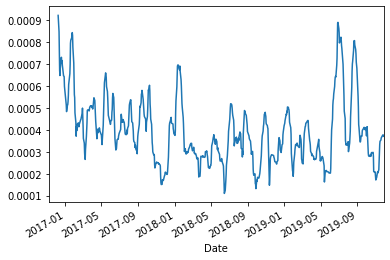

In [17]:
gld_close['Volatility'] = gld_close.change.rolling(21).std().shift()
gld_close['Volatility'].plot()

In [6]:
gld_close.head(10)

,Close,MA_9,MA_21
Date,,,
2016-11-08,121.639999,NaN,NaN
2016-11-09,121.559998,NaN,NaN
2016-11-10,119.750000,NaN,NaN
2016-11-11,117.099998,NaN,NaN
2016-11-14,116.110001,NaN,NaN
2016-11-15,117.120003,NaN,NaN
2016-11-16,116.769997,NaN,NaN
2016-11-17,116.169998,NaN,NaN
2016-11-18,115.150002,117.929999,NaN


In [8]:
true_false = gld_close.MA_9 > gld_close.MA_21

In [59]:
sele = gld_close[gld_close.MA_9 > gld_close.MA_21].index
for day in sele:
    print(day.date())

In [22]:
intSeries = [int(i) for i in true_false.values]

In [39]:
diffSer = np.diff(intSeries) == 1

In [69]:
fulldiffSer = np.concatenate((np.array([False]), diffSer))

In [81]:
diffSer.size

768

In [78]:
insertMethod = np.insert(diffSer, 0, False)

In [87]:
for i in gld_close[insertMethod].index:
    print(i.date())

2017-01-05
2017-03-24
2017-05-24
2017-07-24
2017-10-18
2017-11-14
2017-12-27
2018-02-23
2018-03-23
2018-06-13
2018-08-31
2018-09-20
2018-10-11
2018-11-28
2019-03-22
2019-05-10
2019-06-03
2019-10-02
2019-10-31


In [91]:
gld_close['2017-03-21': '2017-03-28']

,Close,MA_9,MA_21
Date,,,
2017-03-21,118.540001,116.007779,117.068096
2017-03-22,118.830002,116.492223,117.119525
2017-03-23,118.669998,116.931112,117.155715
2017-03-24,118.860001,117.388890,117.151905
2017-03-27,119.529999,117.990000,117.143810
2017-03-28,119.040001,118.300001,117.140000


In [92]:
float('10')

10.0